In [1]:
import os
import scanpy as sc

In [2]:
pth = os.path.join('..', 'data')
pth_in = os.path.join(pth, 'aliia')
pth_out = os.path.join(pth, 'placodes')
pth_grn = os.path.join(pth, 'scenic')

In [3]:
fn = 'epcam_clusters_annotation.h5ad'
adata = sc.read_h5ad(os.path.join(pth_in, fn))
adata

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations', 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_refined_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
placodes = {'E8' : ['Adenohypophyseal',
                    'Epibranchial',
                    'Otic', 'Trigeminal'],
            'E9' : ['Olfactory', 'Lens']}

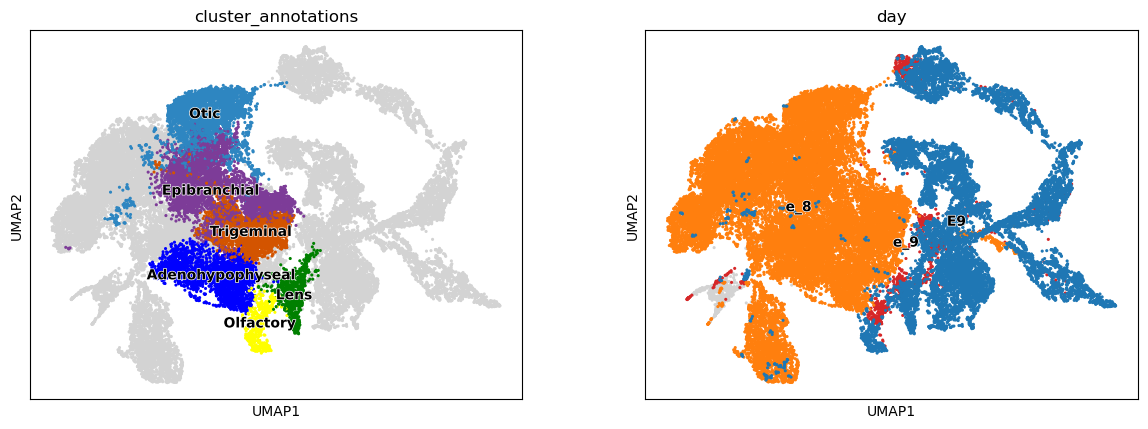

In [5]:
color = ['cluster_annotations', 'day']
groups = placodes['E8'] + \
         placodes['E9'] + \
         ['e_8', 'E9', 'e_9']

sc.pl.umap(adata, size = 20,
           color = color,
           groups = groups,
           legend_loc = 'on data',
           legend_fontoutline = 1,
           na_in_legend = False)

In [6]:
# select placodes, filter genes (>1% cells)
msk_obs = (adata.obs.cluster_annotations
           .isin(placodes['E8'] + placodes['E9']))
msk_hvg = adata.var.highly_variable
adata = adata[msk_obs, msk_hvg].copy()
min_cells = int(adata.n_obs * .01)
sc.pp.filter_genes(adata, min_cells = min_cells)
adata

AnnData object with n_obs × n_vars = 15136 × 2023
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'cluster_annotations', 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [7]:
# assign genes -> placodes (highest mean expression)
adata_clus = sc.get.aggregate(adata = adata,
                              by = 'cluster_annotations',
                              func = 'mean')
cat = adata_clus.obs.cluster_annotations.values
ix = adata_clus.layers['mean'].argmax(axis = 0)
adata.var['cluster_annotations'] = cat[ix]

In [8]:
clus_obs = adata.obs.cluster_annotations
clus_var = adata.var.cluster_annotations
for day in ('E8', 'E9'):

    # select placodes, genes (E8/9)
    msk_obs = clus_obs.isin(placodes[day])
    msk_var = clus_var.isin(placodes[day])
    adata_day = adata[msk_obs, msk_var].copy()

    # save outputs
    pth_day = os.path.join(pth_grn, day)
    adata_day.write_loom(os.path.join(pth_day, 'placodes.loom'))
    adata_day.write_h5ad(os.path.join(pth_out, f'{day}.h5ad'))
    print(f'\n{day}\n', adata_day)

The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations
The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations



E8
 AnnData object with n_obs × n_vars = 13690 × 1012
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'cluster_annotations'
    uns: 'cluster_annotations', 'day_colors', 'hvg', 'leiden', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

E9
 AnnData object with n_obs × n_vars = 1446 × 1011
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'cluster_annotations'
    uns: 'cluster_anno